In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
class CustomLinearRegression:
    def __init__(self, x_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = x_data.shape[0]
        self.x_data = np.c_[np.ones((self.num_samples, 1)), x_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.theta = np.random.randn(self.x_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred - y_target)**2
        return loss

    def predict(self, x_data):
        y_pred = x_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):

            # predict
            y_pred = self.predict(self.x_data)
            
            # Compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # Compute gradient
            loss_grd = 2 * (y_pred - self.y_target) / self.num_samples
            gradients = self.x_data.T.dot(loss_grd)

            # Update weight
            self.theta = self.theta - self.learning_rate * gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses) / len(self.losses),
            'weights': self.theta
        }

$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

- $\text{RSS}$ là Residual Sum of Squares (tổng bình phương sai số dự đoán): $\sum (y_{\text{pred}} - y)^2$
- $\text{TSS}$ là Total Sum of Squares (tổng bình phương của độ lệch giữa các giá trị thực tế và trung bình): $\sum (y - \bar{y})^2$

In [123]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y - y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

In [124]:
# Case 1
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])

print(r2score(y_pred, y))

# Case 2
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
print(r2score(y_pred, y))

1.0
-2.235294117647059


### 3. Sales Prediction

In [125]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [126]:
sales_data = pd.read_csv('./data/SalesPrediction.csv')
sales_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [127]:
# Lấy danh sách các biến phân loại (categorical)
categorical_columns = sales_data.select_dtypes(
    include=['object', 'category']).columns.tolist()

# Lấy danh sách các biến liên tục (numerical)
numerical_columns = sales_data.select_dtypes(
    include=['number']).columns.tolist()

In [128]:
sales_data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [129]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [130]:
sales_data['Influencer'].value_counts()

Influencer
Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: count, dtype: int64

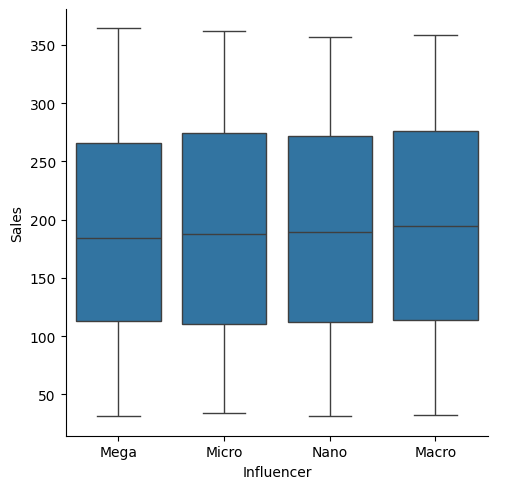

In [131]:
sns.catplot(data=sales_data, x="Influencer", y="Sales", kind="box")

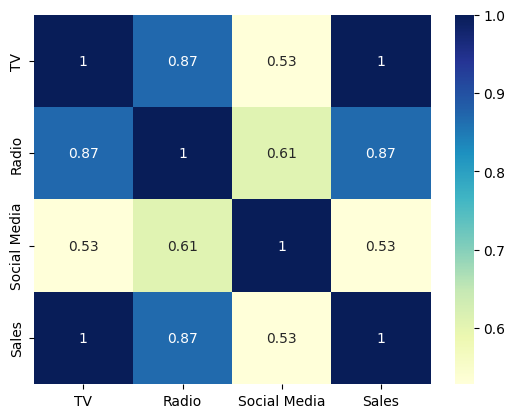

In [132]:
new_df = sales_data[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

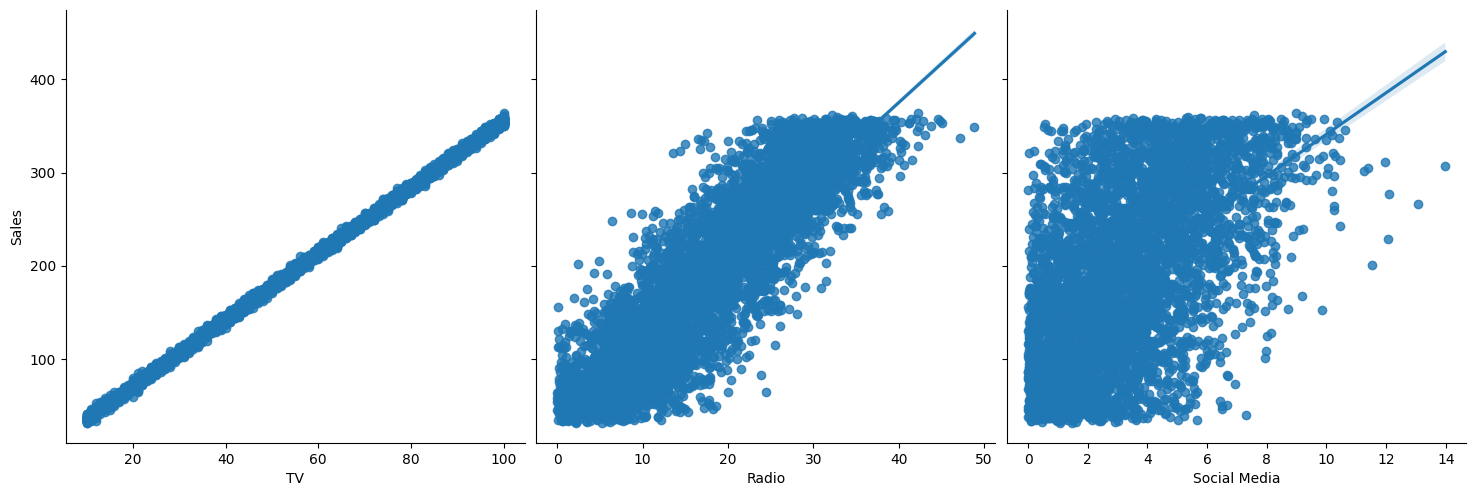

In [133]:
sns.pairplot(data=sales_data,
             x_vars=['TV', 'Radio', 'Social Media'],
             y_vars='Sales',
             height=5,
             kind='reg'
             )
plt.show()

In [134]:
sales_data = pd.get_dummies(sales_data)
sales_data

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [135]:
# Điền giá trị thiếu bằng mean của từng cột
sales_data[numerical_columns] = sales_data[numerical_columns].fillna(sales_data[numerical_columns].mean())

In [136]:
sales_data.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

In [137]:
x = sales_data.iloc[:, :-1]
x

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro
0,16.0,6.566231,2.907983,54.732757,False,True,False
1,13.0,9.237765,2.409567,46.677897,False,True,False
2,41.0,15.886446,2.913410,150.177829,False,True,False
3,83.0,30.020028,6.922304,298.246340,False,True,False
4,15.0,8.437408,1.405998,56.594181,False,False,True
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True
4568,71.0,20.610685,6.545573,249.101915,False,False,False
4569,44.0,19.800072,5.096192,163.631457,False,False,True
4570,71.0,17.534640,1.940873,253.610411,True,False,False


In [138]:
x = sales_data[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
                'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
y = sales_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(

    x, y, test_size=0.33, random_state=0)

### Feature scaling

In [139]:
numerical_col_x = X_train.select_dtypes(include=['number']).columns.tolist()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_col_x] = scaler.fit_transform(X_train[numerical_col_x])
X_test[numerical_col_x] = scaler.transform(X_test[numerical_col_x])

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [141]:
preds = linear_model.predict(X_test)
r2_score(y_test, preds)

0.9952672000833009